# Data Preprocessing

In [60]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC

In [68]:
training_dataset = pd.read_csv('training_set.csv', index_col=0)

In [69]:

duplicate_rows_df = training_dataset[training_dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (296, 58)


In [41]:
def get_accuracy(arr):
    tp = arr[0][0]
    tn = arr[1][1]
    fp = arr[0][1]
    fn = arr[1][0]
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_per = accuracy * 100
    return accuracy_per

In [4]:
training_dataset = training_dataset.drop_duplicates()
training_dataset.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [5]:
print(training_dataset.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64


The data has no null values

In [6]:
#splitting into feature and target variables
X = training_dataset.iloc[:, :-1].values
Y = training_dataset.iloc[:, -1].values

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
training_dataset['Y'].value_counts()

0    2176
1    1438
Name: Y, dtype: int64

# Normalization

In [9]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_val_norm = norm.transform(X_val)

# Standardization

In [10]:
X_train_stand = X_train.copy()
X_val_stand = X_val.copy()
scale = StandardScaler().fit(X_train_stand)
X_train_stand = scale.transform(X_train_stand)
X_val_stand = scale.transform(X_val_stand)

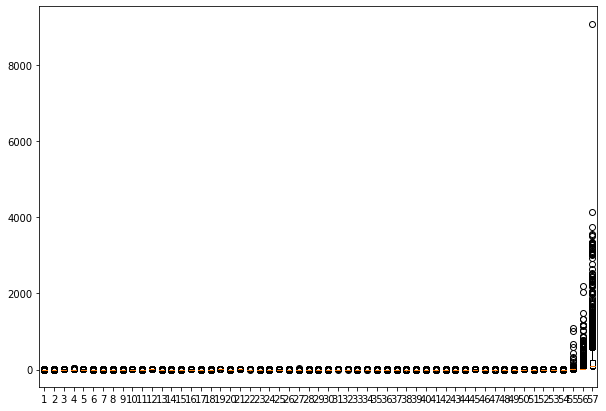

In [11]:
#seeing how standardization has changed our data using boxplots
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))

plt.boxplot(X_train)
plt.show()

#as we observe here in the plot, the last two columns arent scaled and this can affect algos that use mean square error to find the accuracy of the model.

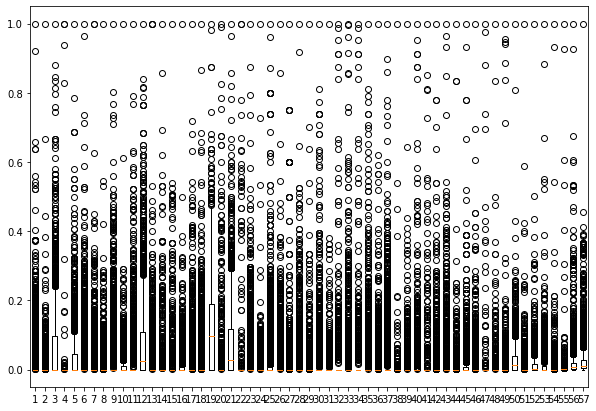

In [12]:
fig = plt.figure(figsize=(10,7))

plt.boxplot(X_train_norm)
plt.show()


#we can see in the plot below that the data is normalized and every value is between 0 and 1

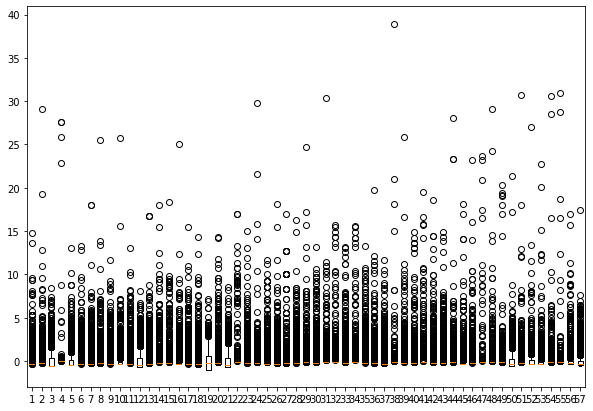

In [13]:
fig = plt.figure(figsize=(10,7))

plt.boxplot(X_train_stand)
plt.show()

#scaled data makes all the feautres comparable, as the data is now centered around mean and it has a unit standard deviation

# Applying KNN to unscaled, unnormalized data

In [47]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
conf_simple_knn = confusion_matrix(y_val, y_pred)
accuracy_simple_knn = get_accuracy(conf_simple_knn)
print("The accuracy of unscaled, unnormalized model using KNN is : " , accuracy_simple_knn)
rmse_simple_knn = np.sqrt(mean_squared_error(y_val, y_pred))
print("The rmse is : " , rmse_simple_knn)

The accuracy of unscaled, unnormalized model using KNN is :  77.59336099585063
The rmse is :  0.4733565147343953


# KNN with normalization

In [53]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_norm, y_train)
y_pred_norm = knn.predict(X_val_norm)
conf_norm_knn = confusion_matrix(y_val, y_pred_norm)
accuracy_norm_knn = get_accuracy(conf_norm_knn)
print("The accuracy of KNN model using normalization is : " , accuracy_norm_knn)
rmse_norm_knn = np.sqrt(mean_squared_error(y_val, y_pred_norm))
print("The rmse is : " , rmse_norm_knn)

The accuracy of KNN model using standardization is :  88.93499308437067
The rmse is :  0.3326410515199428


# KNN with Standardization

In [55]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_stand, y_train)
y_pred_stand = knn.predict(X_val_stand)
conf_stand_knn = confusion_matrix(y_val, y_pred_stand)
accuray_stand_knn = get_accuracy(conf_stand_knn)
print("The accuracy of KNN model using normalization is : " , accuray_stand_knn)
rmse_stand_knn = np.sqrt(mean_squared_error(y_val, y_pred_stand))
print("The rmse is : " , rmse_stand_knn)

The accuracy of KNN model using normalization is :  91.14799446749655
The rmse is :  0.2975232013222407


# Thus, using standardization with K nearest neighbours work the best with the most accuracy of 91 percent and the least RMSE error of 0.297

# Support Vector Classifier

In [61]:
svc = SVC(kernel = 'rbf', C=5)
svc.fit(X_train, y_train)
y_pred_svn = svc.predict(X_val)
conf_simple_svn = confusion_matrix(y_val, y_pred_svn)
accuracy_simple_svn = get_accuracy(conf_simple_svn)
print("The accuracy of SVN on unprocessed data is : ", accuracy_simple_svn)
rmse_simple_svn = np.sqrt(mean_squared_error(y_val, y_pred_svn))
print("The rmse is : " , rmse_simple_svn)

The accuracy of SVN on unprocessed data is :  72.89073305670816
The rmse is :  0.5206656023139212


# Support Vector Classifier with normalized data

In [84]:
svc = SVC(kernel = 'rbf', C=5)
svc.fit(X_train_norm, y_train)
y_pred_svn_norm = svc.predict(X_val_norm)
conf_norm_svn = confusion_matrix(y_val, y_pred_svn_norm)
accuracy_norm_svn = get_accuracy(conf_norm_svn)
print("The accuracy of SVN on normalized data is : ", accuracy_norm_svn)
rmse_norm_svn = np.sqrt(mean_squared_error(y_val, y_pred_svn_norm))
print("The rmse is : " , rmse_norm_svn)

The accuracy of SVN on normalized data is :  92.25449515905947
The rmse is :  0.2783074709909981


# Support Vector Classifier with standardized data

In [85]:
svc = SVC(kernel = 'rbf', C=5)
svc.fit(X_train_stand, y_train)
y_pred_svn_stand = svc.predict(X_val_stand)
conf_stand_svn = confusion_matrix(y_val, y_pred_svn_stand)
accuracy_stand_svn = get_accuracy(conf_stand_svn)
print("The accuracy of SVN on standardized data is : ", accuracy_stand_svn)
rmse_stand_svn = np.sqrt(mean_squared_error(y_val, y_pred_svn_stand))
print("The rmse is : " , rmse_stand_svn)

The accuracy of SVN on standardized data is :  92.11618257261411
The rmse is :  0.2807813638293306


# Thus , we can conclude that Support vector classifier with Normalized data performs the best as compared to the models tried in this notebook. This final model has an accuracy of 92.25 percentage and the mean square error is 0.278

Predicting the values for the test dataset provided using SVN with normalized data.

In [86]:
test_data = pd.read_csv('test_set.csv', index_col = 0)

In [87]:
norm = MinMaxScaler().fit(test_data)
X_test_norm = norm.transform(test_data)

In [88]:
X_test_norm

array([[0.15418502, 0.        , 0.1372549 , ..., 0.00202413, 0.0346908 ,
        0.00549277],
       [0.        , 0.        , 0.16470588, ..., 0.01414027, 0.12594268,
        0.01559442],
       [0.10132159, 0.0210084 , 0.09019608, ..., 0.00737707, 0.14479638,
        0.19180504],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00201056, 0.00301659,
        0.00031568],
       [0.01762115, 0.00560224, 0.11176471, ..., 0.00131976, 0.04826546,
        0.03409306],
       [0.        , 0.        , 0.        , ..., 0.0015083 , 0.00226244,
        0.00088389]])

In [89]:
y_pred_final = svc.predict(X_test_norm)

In [90]:
test_data['Y'] = y_pred_final

In [91]:
test_data.to_csv("final_predictions.csv")